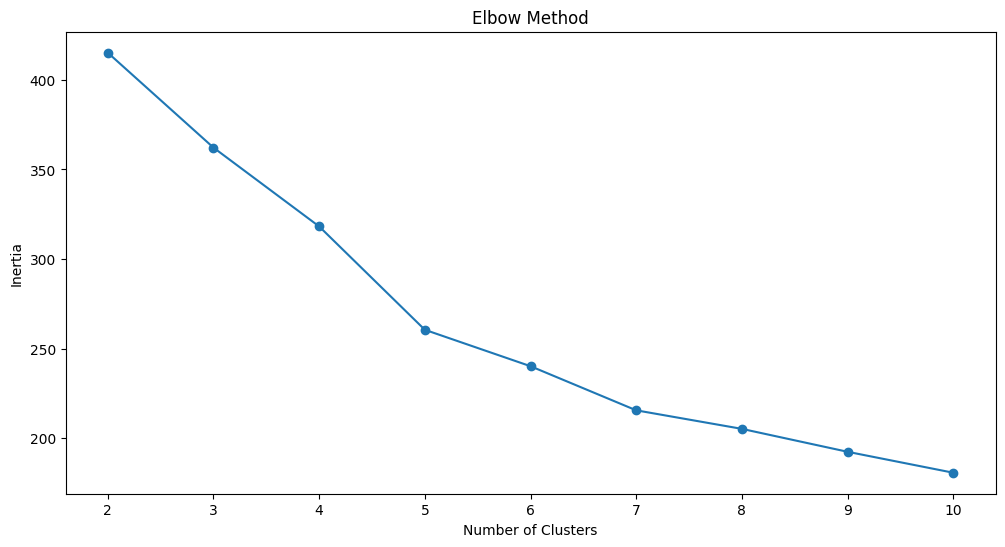

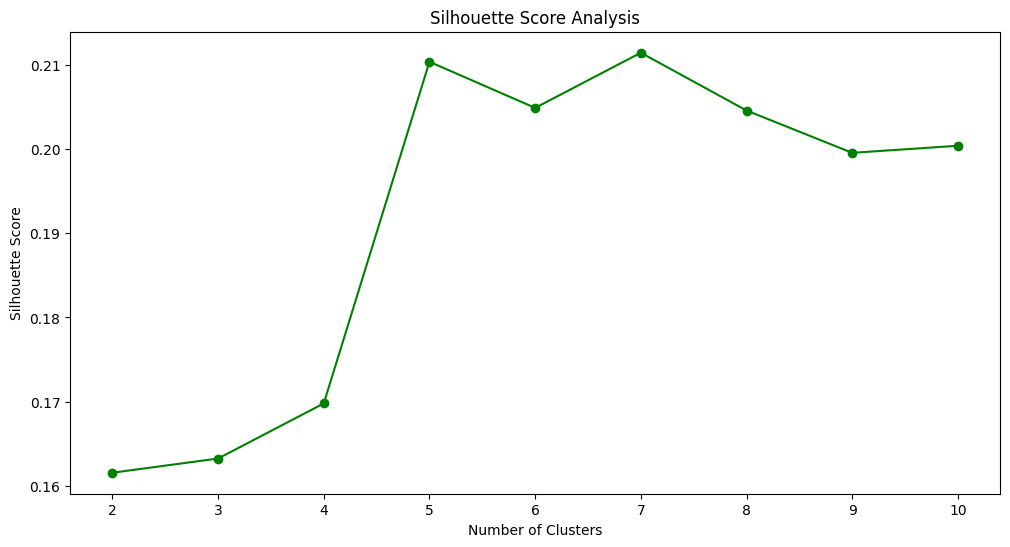

Cluster Characteristics:
          Total_Spend  Frequency     Recency  Electronics_Spend  \
Cluster                                                          
0        3779.565217  37.130435  153.043478         859.608696   
1        1505.222222  28.333333  251.416667        1142.500000   
2        3509.962963  13.740741  173.000000        1222.962963   
3         947.142857  27.357143  130.000000         425.214286   

         Groceries_Spend  
Cluster                   
0            1957.000000  
1            1963.972222  
2             985.555556  
3             837.785714  


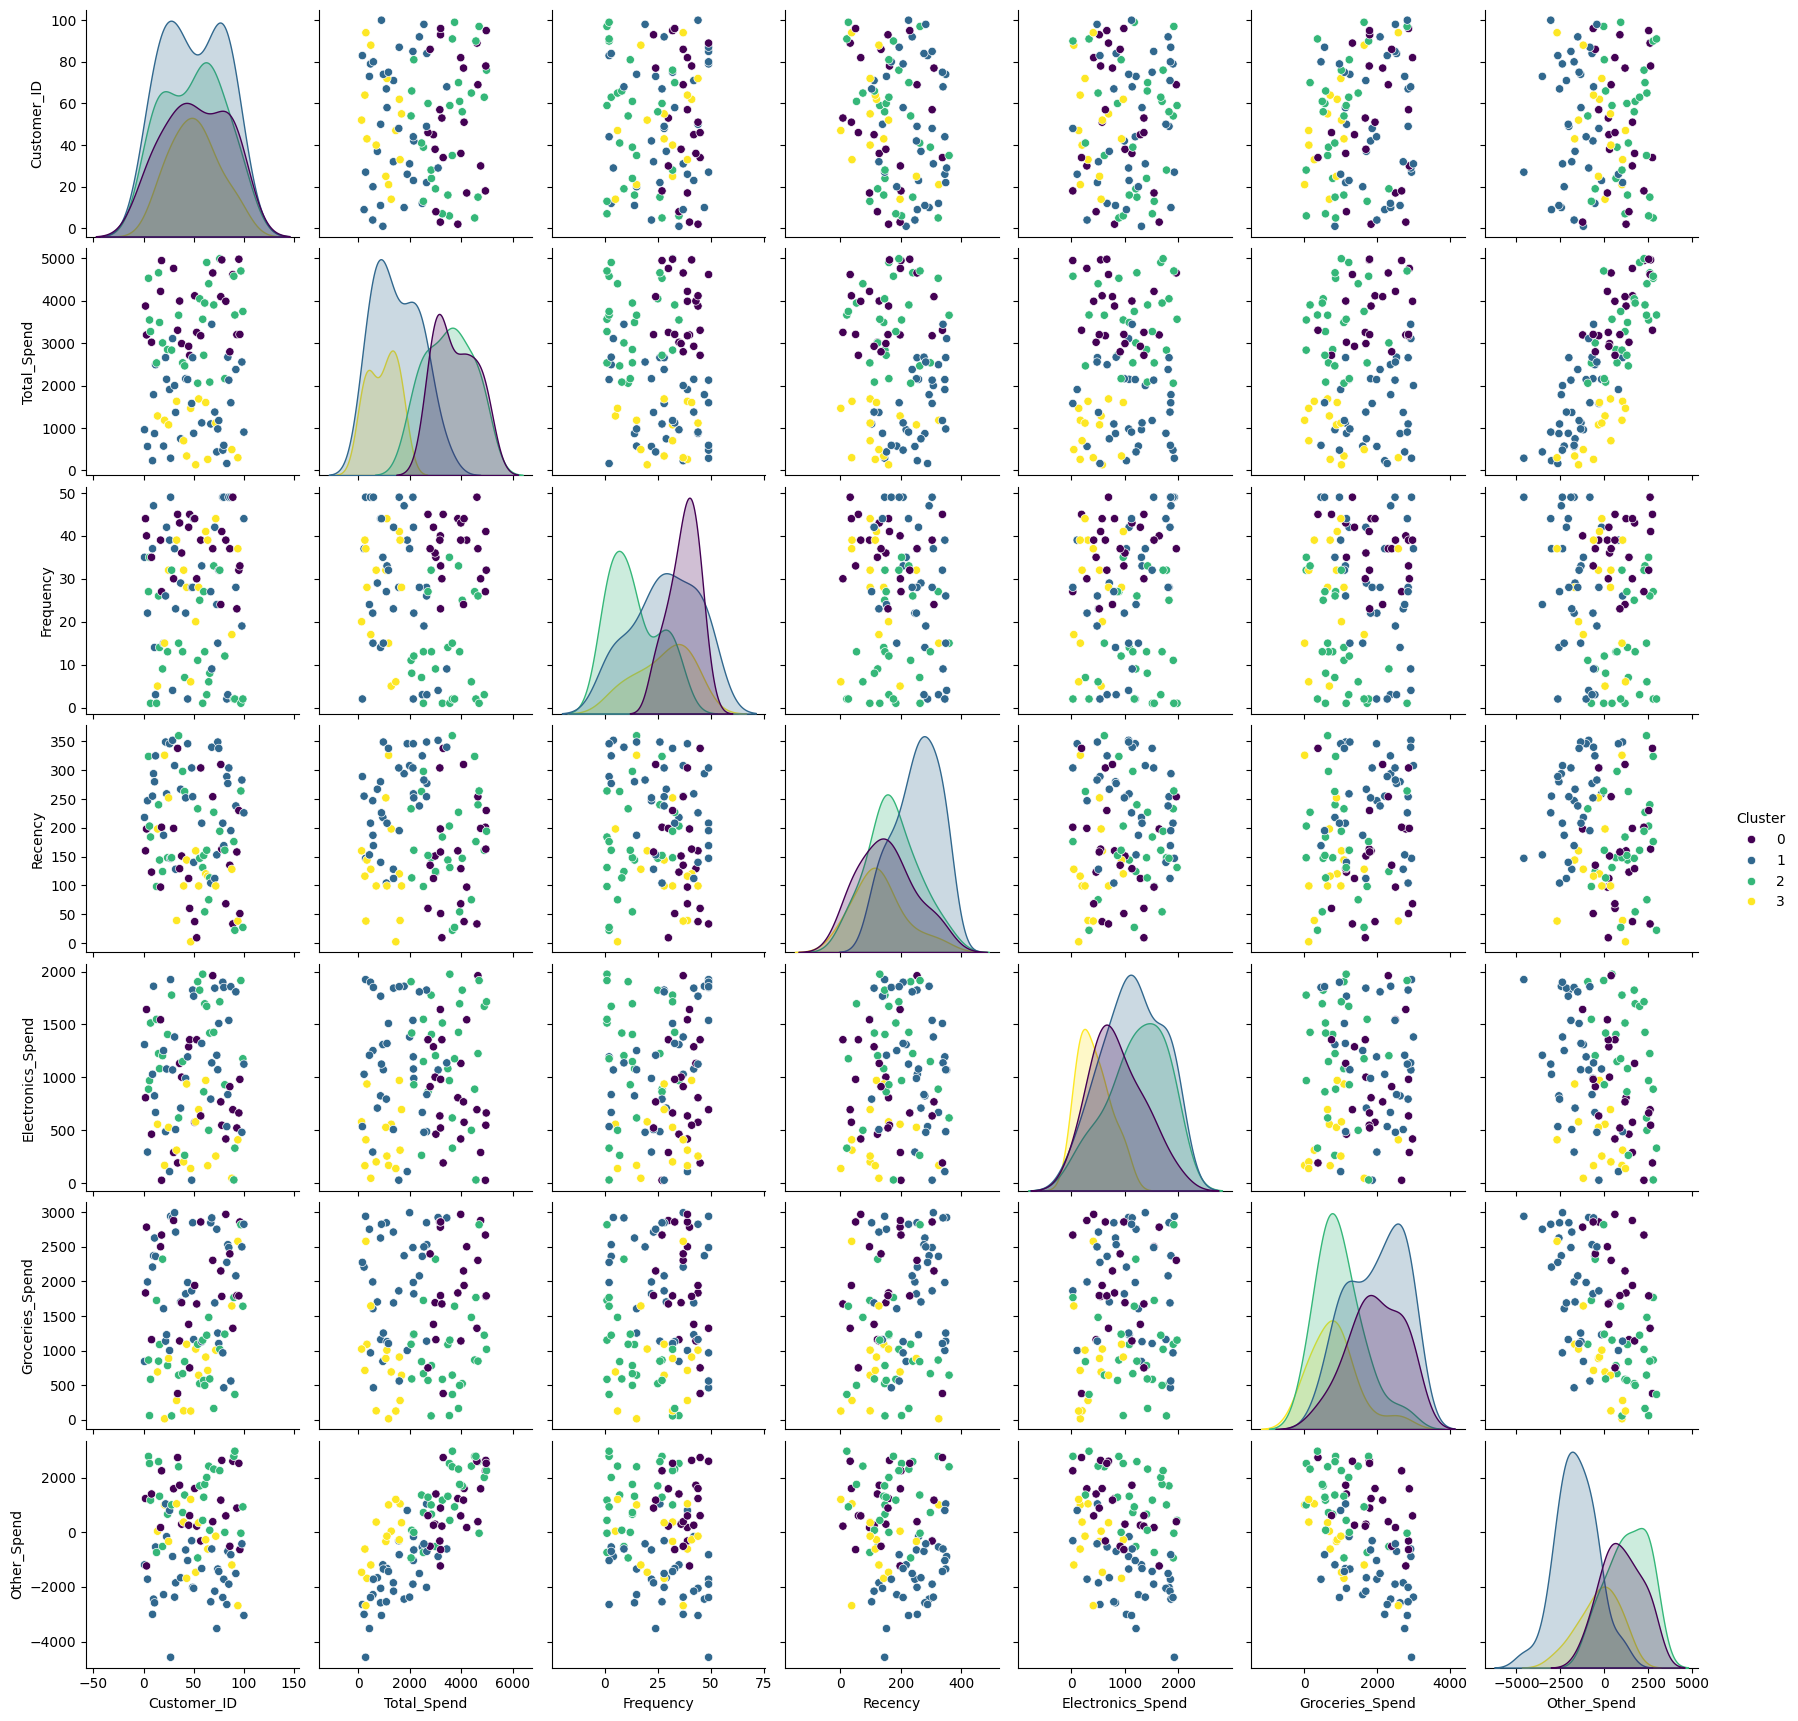

In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from a CSV file
file_path = "/content/sample_data/retail_customers_dataset.csv"  # Replace with your file path
df = pd.read_csv(file_path)

# Select Features for Clustering
features = df[['Total_Spend', 'Frequency', 'Recency', 'Electronics_Spend', 'Groceries_Spend']]  # Adjust columns as needed

# Scale the Features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determine Optimal Clusters Using Elbow Method
inertia = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_features, kmeans.labels_))

# Plot Elbow Method
plt.figure(figsize=(12, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(12, 6))
plt.plot(k_range, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Score Analysis')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Apply K-means with Optimal Clusters (e.g., k=4)
optimal_k = 4  # Adjust based on Elbow Method or Silhouette Analysis
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Save the Clustering Results
df.to_csv("clustered_dataset.csv", index=False)  # Replace with your desired output file path

# Analyze Cluster Characteristics
cluster_summary = df.groupby('Cluster')[['Total_Spend', 'Frequency', 'Recency', 'Electronics_Spend', 'Groceries_Spend']].mean()
print("Cluster Characteristics:\n", cluster_summary)

# Visualize the Clusters (Pairplot)
sns.pairplot(df, hue='Cluster', diag_kind='kde', palette='viridis')
plt.show()
